<a href="https://colab.research.google.com/github/hoangnuthuphuong/MACHINE-LEARNING-TEST/blob/main/THI%20GI%E1%BB%AEA%20K%E1%BB%B2/WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WINE**

Tập dữ liệu [Wine](https://archive.ics.uci.edu/ml/datasets/Wine) nói về dữ liệu về 3 loại rượu vang(Barbera, Barolo và Grignolino) được trồng ở vùng Piedmont, Ý: Phân tích đã xác định số lượng của 13 thành phần được tìm thấy trong mỗi loại trong số ba loại rượu vang.

Có 14 biến (1 biến phân loại và 13 biến feature):
> class (biến nhãn lớp)

> 1) Alcohol

>	2) Malic acid

>	3) Ash

> 4) Alcalinity of ash  

>	5) Magnesium

> 6) Total phenols

>	7) Flavanoids

>	8) Nonflavanoid phenols

>	9) Proanthocyanins

> 10)Color intensity

>	11)Hue

>	12)OD280/OD315 of diluted wines

>	13)Proline

**NOTE**

* Biến class có 3 nhãn lớp là 1,2 và 3. Trong đó:

> Nhãn lớp 1 có 59 quan sát 

> Nhãn lớp 2 có 71 quan sát 

> Nhãn lớp 3 có 48 quan sát. 

(Mỗi quan sát chính là một dòng)

* Ngoài biến class (cột đầu tiên), các biến còn lại đều là biến liên tục và có thể nằm ở các miền giá trị khác nhau.

* Không có giá trị missing (giá trị bị thiếu)

**Tập dữ liệu Wine phục vụ cho bài toán phân lớp đa nhãn**

Tập thuộc tính Class đóng vai trò nhãn lớp, chẩn đoán xem thuộc loại rượu nào.

> Barbera

> Barolo 

> Grignolino

Thuộc tính **Class** không cần thiết trong huấn luyện vì đóng vai trò là nhãn lớp

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# **ĐỌC VÀ XỬ LÍ DỮ LIỆU**

In [172]:
data = pd.read_csv('/content/wine.data', header=None, sep=',')
data.columns = ['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315','Proline']
data.head(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Kiểm tra thông tin và kích thước của tập dữ liệu

In [173]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


(178, 14)

Qua  hàm **data.info()** => ta có thể thấy được tập dữ liệu không có giá trị missing hay null/NaN.

In [177]:
from sklearn.preprocessing import LabelEncoder
# Biến nhãn lớp Class
y = data["Class"]         
# Biến dữ liệu sau khi xóa bỏ thuộc tính không cần thiết và thuộc tính nhãn lớp
X = data.drop(["Class"], axis=1) 
# Chuẩn hóa y
y = LabelEncoder().fit_transform(y)

In [178]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [175]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**KIỂM TRA CÂN BẰNG NHÃN LỚP**

Số trường hợp là rượu Barbera:  71
Số trường hợp là rượu Barolo:  59
Số trường hợp là rượu Grignolino:  48


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'rượu Barbera'),
 Text(0, 0, 'rượu Barolo'),
 Text(0, 0, 'rượu Grignolino')]

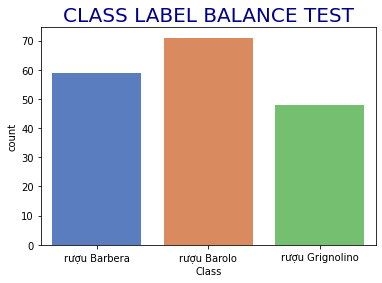

In [53]:
# Biểu đồ đếm số trường hợp Ác tính (M - malignant) và Lành tính (B - benign)
plt.title("CLASS LABEL BALANCE TEST", size=20, color="darkblue")
ax = sns.countplot(y, label="Count", palette="muted", x="diagnosis")
a, b, c = y.value_counts()
print('Số trường hợp là rượu Barbera: ', a)
print('Số trường hợp là rượu Barolo: ', b)
print('Số trường hợp là rượu Grignolino: ', c)
ax.set_xticklabels(["rượu Barbera", "rượu Barolo", "rượu Grignolino",])

=> **KẾT LUẬN:** NHÃN LỚP KHÔNG CÂN BẰNG

# **CHIA TRAIN-TEST**


Khi phân chia dữ liệu, trừ dữ liệu kiểu thời gian (có gắn với trục thời gian), ta nên dùng hàm **shuffle** và **random_state** để xáo trộn dữ liệu, nhằm đảm bảo tính ngẫu nhiên khi phân chia tập dữ liệu. Đặt trạng thái ngẫu nhiên cho phép thử nghiệm dễ dàng sao chép và đảm bảo kết quả trong cùng một tham số.

In [200]:
# Phân chia train - test theo tỉ lệ 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=9)

# Chuẩn hóa dữ liệu
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train 
y_test

print("X_train\n",X_train[:5])
print("\nX_test\n",X_test[:5])
print("\ny_train\n",y_train)
print("\ny_test\n",y_test)

X_train
 [[ 0.67718514  0.75888192  1.3197308   1.17073922 -0.16786703 -1.10501138
  -1.45721116  1.05598524 -1.78083123 -0.28139172 -0.28227541 -0.71464501
  -0.66137931]
 [ 0.72655508 -0.56075559  0.36863845  0.25780693  1.19220879  1.05960439
   0.77085213 -1.30543057  1.53091585  0.55509447  0.10916119  0.62079392
   1.30936588]
 [-0.84094035  0.44730084 -0.50929295 -0.50296997 -0.81211347  0.27665826
   0.24834172 -0.91186127  0.72912445 -1.24995467  0.84854145  0.99251404
  -1.41683163]
 [-1.66788675 -0.32248771 -0.2898101  -0.50296997 -0.09628409  1.1517157
   0.2582004  -1.54157215 -0.38641141 -0.7656732   0.89203441  0.52442204
  -1.23617999]
 [ 0.23285573  1.1254479  -0.76535628  0.40996231  0.19004766 -1.1817708
  -1.42763509  0.50498822 -0.47356265 -0.43548128 -1.54357115 -1.23780665
   0.35683904]]

X_test
 [[ 0.98574723 -0.40496505  1.1734089  -0.77684965  1.12062585  1.12101193
   0.78071082  0.19013277  0.18878677  0.57710726  0.76155554  0.48311981
   2.14693259]
 [ 0.

**Xác định số lượng k-fold được xác định tùy thuộc vào số lượng y_train**

In [91]:
unique, counts = np.unique(y_train, return_counts=True)
result = dict(zip(unique, counts))
print("Số lượng k-fold được xác định")
print(result)

Số lượng k-fold được xác định
{0: 42, 1: 60, 2: 40}


Sử dụng **MinMaxScaler()** để xử lý trước dữ liệu trước khi gửi dữ liệu đến mô hình. Điều này chuẩn hóa nó thành phạm vi 0 đến 1 do đó loại bỏ các số âm.

In [180]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**MÔ HÌNH NAIVE BAYES**


In [259]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb_score = cross_val_score(gnb, X_train, y_train, cv=10, scoring=None)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Kết quả huấn luyện 10-fold cv của mô hình Naive Bayes:')
print(gnb_score)

Kết quả huấn luyện 10-fold cv của mô hình Naive Bayes:
[0.86666667 0.86666667 0.92857143 0.92857143 0.78571429 1.
 0.85714286 0.85714286 1.         0.92857143]


**KẾT QUẢ CÁC CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG MÔ HÌNH NAIVE BAYES**


In [260]:
acc_score_n=round(accuracy_score(y_test, y_pred),3)
print("Accuracy: {}%".format(round(100*accuracy_score(y_test, y_pred),3)))

precision_sc_n=round(precision_score(y_test, y_pred, average='weighted'),5)
print("\nPrecision score: {}%".format(100*precision_sc_n))
print('Kết quả dự đoán precision_score:\n',precision_score(y_test, y_pred,average=None))

recall_cs_n=round(recall_score(y_test, y_pred, average='weighted'),3)
print("\nRecall score: {}%".format(100*recall_cs_n))
print('Kết quả dự đoán recall_score:\n',recall_score(y_test, y_pred,average=None))

f1_sc_n=round(f1_score(y_test, y_pred, average='weighted'),5)
print("\nF1 score: {}%".format(100*f1_sc_n))
print('Kết quả dự đoán f1_score:\n',f1_score(y_test, y_pred,average=None))


Accuracy: 88.889%

Precision score: 91.852%
Kết quả dự đoán precision_score:
 [1.         0.73333333 1.        ]

Recall score: 88.9%
Kết quả dự đoán recall_score:
 [0.76470588 1.         1.        ]

F1 score: 89.003%
Kết quả dự đoán f1_score:
 [0.86666667 0.84615385 1.        ]


Confusion matrix:
Confusion matrix, without normalization
[[13  4  0]
 [ 0 11  0]
 [ 0  0  8]]


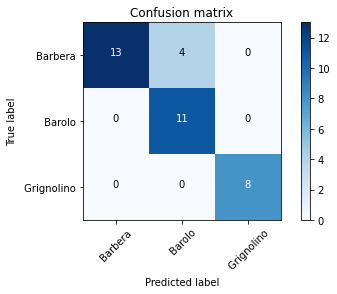

In [261]:
# Model Evaluation Metrics
print("Confusion matrix:")
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, classes=['Barbera', ' Barolo',' Grignolino'], title='Confusion matrix')

In [262]:
# Evaluate the model
print("Naive Bayes")    
print("----------------------------------")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

Naive Bayes
----------------------------------

Accuracy: 0.8888888888888888

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.73      1.00      0.85        11
           2       1.00      1.00      1.00         8

    accuracy                           0.89        36
   macro avg       0.91      0.92      0.90        36
weighted avg       0.92      0.89      0.89        36



#**MÔ HÌNH k-NN**

In [263]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, p = 3)
knn_score = cross_val_score(knn, X_train, y_train, cv=10, scoring=None)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Kết quả huấn luyên 10-fold cv của mô hình k-NN:')
print(knn_score)

Kết quả huấn luyên 10-fold cv của mô hình k-NN:
[1.         0.8        0.92857143 0.92857143 0.92857143 0.85714286
 0.92857143 1.         1.         1.        ]


**KẾT QUẢ CÁC CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG MÔ HÌNH K-NN**


In [264]:
acc_score_k=round(accuracy_score(y_test, y_pred),3)
print("Accuracy: {}%".format(round(100*accuracy_score(y_test, y_pred),3)))

precision_sc_k=round(precision_score(y_test, y_pred, average='weighted'),5)
print("\nPrecision score: {}%".format(100*precision_sc_k))
print('Kết quả dự đoán precision_score:\n',precision_score(y_test, y_pred,average=None))

recall_cs_k=round(recall_score(y_test, y_pred, average='weighted'),3)
print("\nRecall score: {}%".format(100*recall_cs_k))
print('Kết quả dự đoán recall_score:\n',recall_score(y_test, y_pred,average=None))

f1_sc_k=round(f1_score(y_test, y_pred, average='weighted'),5)
print("\nF1 score: {}%".format(100*f1_sc_k))
print('Kết quả dự đoán f1_score:\n',f1_score(y_test, y_pred,average=None))


Accuracy: 97.222%

Precision score: 97.454%
Kết quả dự đoán precision_score:
 [1.         0.91666667 1.        ]

Recall score: 97.2%
Kết quả dự đoán recall_score:
 [0.94117647 1.         1.        ]

F1 score: 97.241%
Kết quả dự đoán f1_score:
 [0.96969697 0.95652174 1.        ]


Confusion matrix:
Confusion matrix, without normalization
[[16  1  0]
 [ 0 11  0]
 [ 0  0  8]]


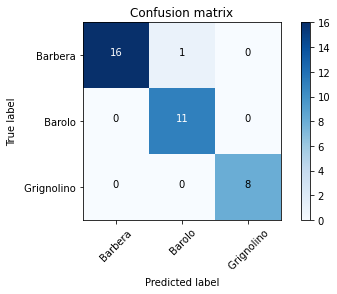

In [265]:
print("Confusion matrix:")
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, classes=['Barbera', ' Barolo',' Grignolino'], title='Confusion matrix')

In [266]:
# Evaluate the model
print("MÔ HÌNH K LÂN CẬN")    
print("----------------------------------")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

MÔ HÌNH K LÂN CẬN
----------------------------------

Accuracy: 0.9722222222222222

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



# **KẾT QUẢ SO SÁNH CÁC MÔ HÌNH**

In [268]:
knn_model = [acc_score_k, precision_sc_k, recall_cs_k, f1_sc_k]
naiveb_model = [acc_score_n, precision_sc_n, recall_cs_n, f1_sc_n]
data = {'k-NN model': knn_model, 'Naive Bayes model': naiveb_model}
id = ['Accuracy', 'Precision', 'Recall', 'f1-measure ']
df = pd.DataFrame(data=data, index = id)
df

,k-NN model,Naive Bayes model
Accuracy,0.97200,0.88900
Precision,0.97454,0.91852
Recall,0.97200,0.88900
f1-measure,0.97241,0.89003


Nhìn vào kết quả của bảng trên, ta có thể dễ dàng kết luận mô hình k lân cận vượt trội hơn so với mô hình Naive Bayes.